In [1]:
import glob
import ntpath
import time
import shutil
import subprocess
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

#ZOGY in Parallel routines
#from zogyp.zip import run_ZOGY
#from zogyp.zip import rdfits
from zogyp.zip import config_loc

#Image alignment
#from zogyp.spali2 import spalipy

#Stacking
from zogyp.zo_coadd import med_comb
from zogyp.zo_coadd import prop_coad

LOC = config_loc()
t_f = LOC.replace('configfls','test')
T = [i for i in glob.glob(t_f+'/*')]

For a faster performance install pyfftw
 
 
 
For a faster performance install pyfftw
 
 
 
/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/configfls


---

#### The coad funcitons take a list of fits files and stacks them (Assuming they are aligned).
#### This can be done using either the directory of the images needing to be stacked:

In [2]:
Ref_data = prop_coad([t_f])

['/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits', '/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits']
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits


#### or using the individual file names:

['/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits', '/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits']
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits


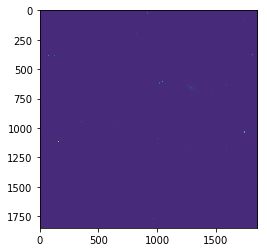

In [3]:
Ref_data = prop_coad(T)

plt.imshow(Ref_data)
plt.show()

#### Furthermore, instead of just having a data array, you can save it to a file.

['/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits', '/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits']
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits
Making PSF Catalog
Modelling PSF /home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits


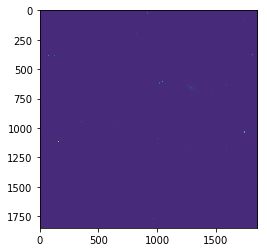

0

In [4]:
t = time.time()
out_file, R = prop_coad(T, make_fits=True)
t1 = time.time() - t
plt.imshow(fits.getdata(out_file))
plt.show()

subprocess.call(['rm', out_file])

#### All of the above can be done for median combine 
#### Which is notably faster than Proper Co-Addition

['/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/1.fits', '/home/rcutter/anaconda3/lib/python3.6/site-packages/zogyp/test/2.fits']


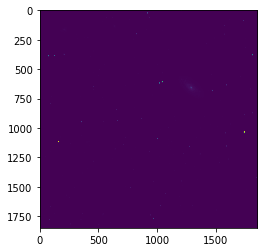

Prop coad 4.868231773376465 seconds
Med comb 0.38112640380859375 seconds


In [5]:
t = time.time()
out_file, R = med_comb(T, make_fits=True)
t = time.time() - t
plt.imshow(fits.getdata(out_file))
plt.show()

subprocess.call(['rm', out_file])

print('Prop coad '+str(t1)+' seconds')
print('Med comb '+str(t)+' seconds')